<a href="https://colab.research.google.com/github/amrendra1002/DS-ML/blob/master/DL_Assignmentv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from matplotlib import pyplot
import os

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
os.chdir(r'/content/drive/My Drive/Data/archive (1).zip (Unzipped Files)/chest_xray')

In [7]:
!ls

test  train  val


In [8]:
normal_images = []
for image in tqdm(os.listdir("train/NORMAL")):
    if image is not None:
        normal_images.append(image)


100%|██████████| 1334/1334 [00:00<00:00, 787501.98it/s]


In [9]:
pnem_images = []
for image in tqdm(os.listdir("train/PNEUMONIA")):
    if image is not None:
        pnem_images.append(image)

100%|██████████| 3872/3872 [00:00<00:00, 2046414.45it/s]


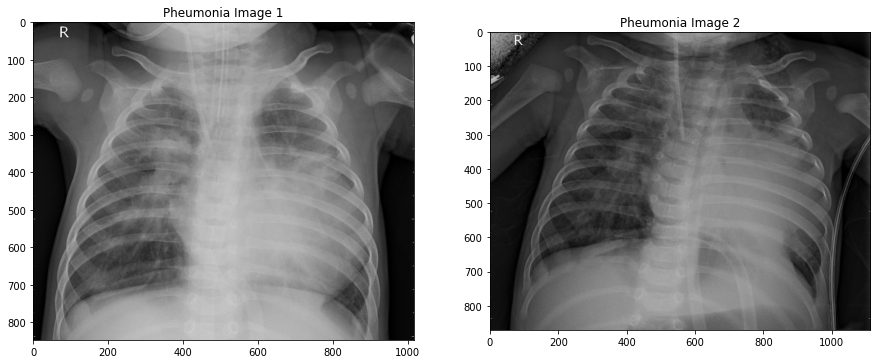

In [10]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    pnem_img = load_img("train/PNEUMONIA" + "/" + pnem_images[i])
    ax[i].imshow(pnem_img)
    ax[i].set_title('Pheumonia Image ' + str(i+1))

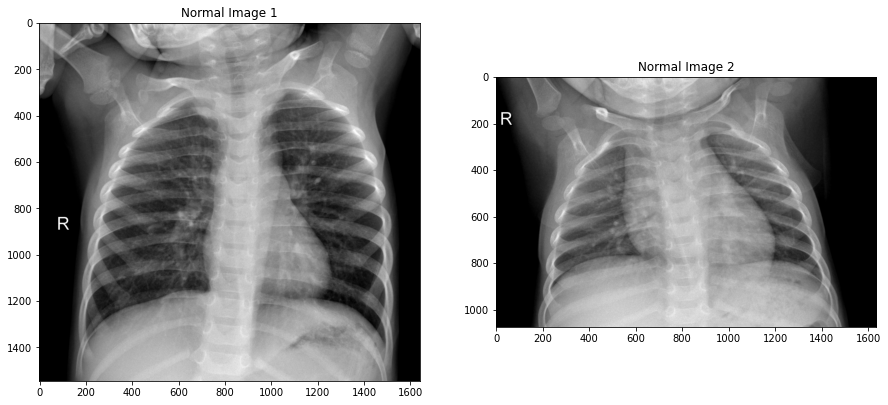

In [11]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))
for i in range(2):
    normal_img = load_img("train/NORMAL" + "/" + normal_images[i])
    ax[i].imshow(normal_img)
    ax[i].set_title('Normal Image ' + str(i+1))

Text(0.5, 1.0, 'Width Shifted Pheumonia Image')

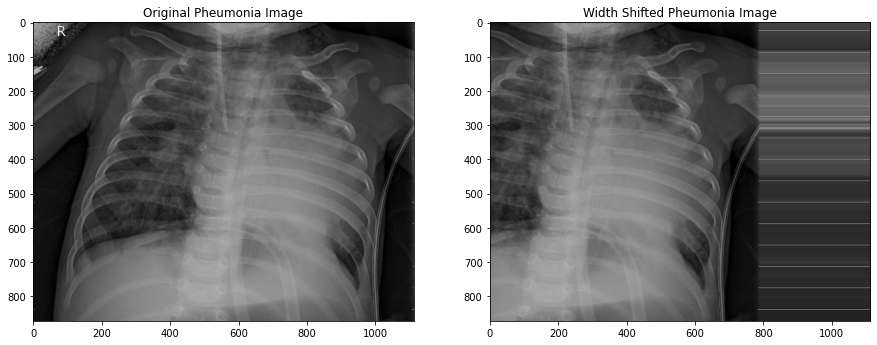

In [12]:
#Increase rank of image from 3 to 4
pnem_img1 = np.expand_dims(pnem_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.3)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# generate batch of images

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Width Shifted Pheumonia Image')


Text(0.5, 1.0, 'Horizontal Flip Pheumonia Image')

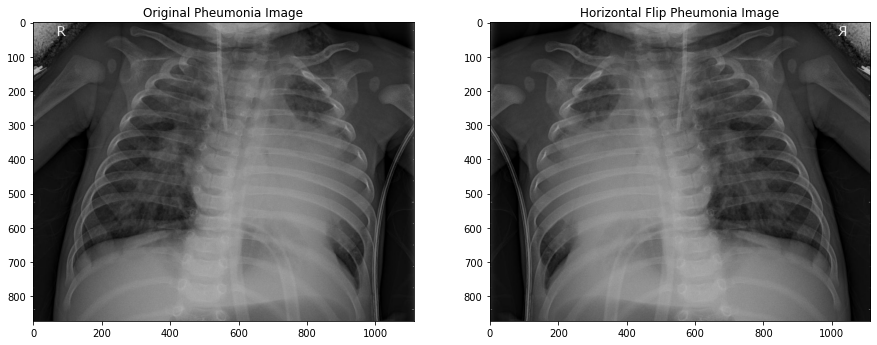

In [13]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(pnem_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(pnem_img)
ax[0].set_title('Original Pheumonia Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Pheumonia Image')

Text(0.5, 1.0, 'Width Shift Normal Image')

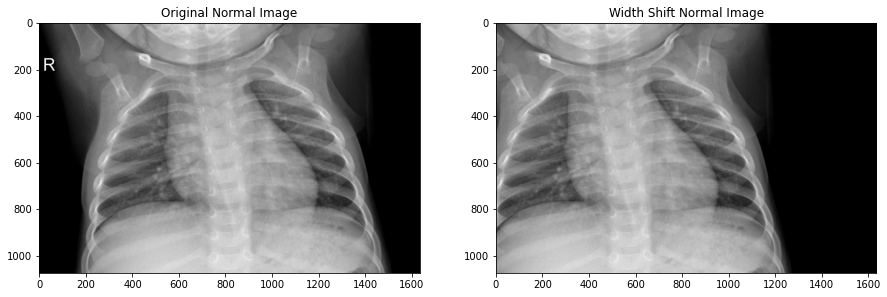

In [14]:
#Increase rank of image from 3 to 4
normal_img1 = np.expand_dims(normal_img, 0)
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Width Shift Normal Image')

Text(0.5, 1.0, 'Horizontal Flip Normal Image')

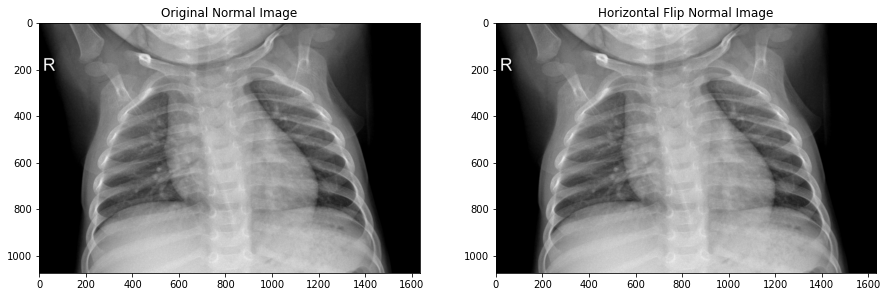

In [15]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(horizontal_flip=True)

# iterator
aug_iter = datagen.flow(normal_img1, batch_size=1)

#aug_iter.shape

# generate samples and plot
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(15,15))

# convert to unsigned integers
image = next(aug_iter)[0].astype('uint8')

# plot image
ax[0].imshow(normal_img)
ax[0].set_title('Original Normal Image')
ax[1].imshow(image)
ax[1].set_title('Horizontal Flip Normal Image')

In [17]:
train_pneum_image = []
i = 0
for image1 in tqdm(os.listdir("train/PNEUMONIA")):
    img = load_img("train/PNEUMONIA" + "/" + image1, target_size=(256,256,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    train_pneum_image.append(img)
    i = i+ 1
    if i == 100:
      break

  3%|▎         | 99/3872 [00:22<18:34,  3.38it/s]

In [35]:
def load_images(dir):
  images = []
  i = 0
  #train_image = train_pneum_image.copy()
  for image1 in tqdm(os.listdir(dir)):
      img = load_img(dir + "/" + image1, target_size=(256,256,1), color_mode="grayscale")
      img = np.array(img)
      img = img/255
      images.append(img)
      i = i+ 1
      if i == 100:
        break
  return images

In [18]:
X_pnem = np.array(train_pneum_image)

In [19]:
X_pnem.shape

(100, 256, 256)

In [29]:
X_pnem[0]

array([[0.09019608, 0.07058824, 0.0627451 , ..., 0.1372549 , 0.22352941,
        0.21960784],
       [0.08235294, 0.05882353, 0.03529412, ..., 0.25882353, 0.06666667,
        0.14901961],
       [0.0627451 , 0.03137255, 0.        , ..., 0.29411765, 0.41176471,
        0.42745098],
       ...,
       [0.0627451 , 0.03137255, 0.02352941, ..., 0.03529412, 0.        ,
        0.03921569],
       [0.02352941, 0.02352941, 0.01960784, ..., 0.03529412, 0.03529412,
        0.03529412],
       [0.02352941, 0.02352941, 0.01960784, ..., 0.03529412, 0.03529412,
        0.03529412]])

In [30]:
type(train_pneum_image)


list

In [20]:
Y_pnem = np.ones(X_pnem.shape[0])

In [21]:
Y_pnem.shape

(100,)

In [22]:
train_normal_image = []
i = 0
train_image = train_pneum_image.copy()
for image1 in tqdm(os.listdir("train/NORMAL")):
    img = load_img("train/NORMAL" + "/" + image1, target_size=(256,256,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    train_normal_image.append(img)
    train_image.append(img)
    i = i+ 1
    if i == 100:
      break


  7%|▋         | 99/1334 [01:15<13:28,  1.53it/s]

In [23]:
X = np.array(train_image)
X.shape

(200, 256, 256)

In [24]:
X_normal = np.array(train_normal_image)

In [22]:
Y_normal = np.zeros(X_normal.shape[0])

In [23]:
Y = np.concatenate([Y_pnem, Y_normal], axis=0)

In [24]:
Y.shape

(5206,)

In [36]:
train_normal = load_images("train/NORMAL")
train_pnem = load_images("train/PNEUMONIA")
test_normal = load_images("test/NORMAL")
test_pnem = load_images("test/PNEUMONIA")




  0%|          | 0/1334 [00:00<?, ?it/s]


  0%|          | 5/1334 [00:00<00:28, 46.40it/s]


  1%|          | 12/1334 [00:00<00:25, 51.30it/s]


  1%|▏         | 19/1334 [00:00<00:24, 54.41it/s]


  2%|▏         | 25/1334 [00:00<00:23, 55.33it/s]


  2%|▏         | 30/1334 [00:00<00:26, 49.58it/s]


  3%|▎         | 36/1334 [00:00<00:25, 50.55it/s]


  3%|▎         | 41/1334 [00:00<00:26, 49.16it/s]


  3%|▎         | 46/1334 [00:00<00:26, 48.90it/s]


  4%|▍         | 51/1334 [00:00<00:26, 47.80it/s]


  4%|▍         | 56/1334 [00:01<00:28, 44.18it/s]


  5%|▍         | 62/1334 [00:01<00:27, 45.73it/s]


  5%|▌         | 67/1334 [00:01<00:28, 45.23it/s]


  5%|▌         | 72/1334 [00:01<00:27, 46.34it/s]


  6%|▌         | 78/1334 [00:01<00:25, 49.41it/s]


  6%|▋         | 84/1334 [00:01<00:25, 49.81it/s]


  7%|▋         | 90/1334 [00:01<00:24, 50.72it/s]


  7%|▋         | 96/1334 [00:01<00:25, 48.87it/s]



  0%|          | 0/3872 [00:00<?, ?it/s]


  1%|          | 20/3872 [0

In [37]:
X_con = np.concatenate([train_normal, train_pnem, test_normal, test_pnem], axis=0)

In [39]:
type(X_con)

numpy.ndarray

In [25]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X, Y, random_state=23)

In [26]:
X_train.shape, Y_train.shape

((5206, 256, 256), (5206,))

In [34]:
test_pneum_image = []
i = 0
for image1 in tqdm(os.listdir("test/PNEUMONIA")):
    img = load_img("test/PNEUMONIA" + "/" + image1, target_size=(256,256,1), color_mode="grayscale")
    img = np.array(img)
    img = img/255
    test_pneum_image.append(img)
    i = i+ 1
    if i == 50:
      break



  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 1/390 [00:00<02:04,  3.11it/s]

  1%|          | 2/390 [00:00<02:21,  2.75it/s]

  1%|          | 3/390 [00:01<02:26,  2.64it/s]

  1%|          | 4/390 [00:01<02:21,  2.74it/s]

  1%|▏         | 5/390 [00:01<02:25,  2.65it/s]

  2%|▏         | 6/390 [00:02<02:13,  2.88it/s]

  2%|▏         | 7/390 [00:02<02:14,  2.86it/s]

  2%|▏         | 8/390 [00:02<02:16,  2.79it/s]

  2%|▏         | 9/390 [00:03<02:24,  2.64it/s]

  3%|▎         | 10/390 [00:03<02:25,  2.61it/s]

  3%|▎         | 11/390 [00:04<02:17,  2.75it/s]

  3%|▎         | 12/390 [00:04<02:11,  2.87it/s]

  3%|▎         | 13/390 [00:04<02:14,  2.80it/s]

  4%|▎         | 14/390 [00:05<02:17,  2.74it/s]

  4%|▍         | 15/390 [00:05<02:26,  2.56it/s]

  4%|▍         | 16/390 [00:05<02:23,  2.60it/s]

  4%|▍         | 17/390 [00:06<02:15,  2.75it/s]

  5%|▍         | 18/390 [00:06<02:28,  2.51it/s]

  5%|▍         | 19/390 [00:07<02:39,  2.33it/s]

  5%|▌         |

In [28]:
test_normal_image = []
i = 0
test_image = test_pneum_image.copy()
for image1 in tqdm(os.listdir("test/NORMAL")):
    img1 = load_img("test/NORMAL" + "/" + image1, target_size=(256,256,1), color_mode="grayscale")
    img = np.array(img1)
    img = img/255
    test_normal_image.append(img)
    test_image.append(img)
#    i = i+ 1
#    if i == 50:
#      break

100%|██████████| 234/234 [00:03<00:00, 67.79it/s]


In [29]:
X_pnem = np.array(test_pneum_image)

In [30]:
X_pnem.shape

(390, 256, 256)

In [31]:
Y_pnem = np.ones(X_pnem.shape[0])
Y_pnem.shape

(390,)

In [32]:
X = np.array(test_image)
X.shape

(624, 256, 256)

In [33]:
X_normal = np.array(test_normal_image)

In [34]:
Y_normal = np.zeros(X_normal.shape[0])

In [35]:
Y = np.concatenate([Y_pnem, Y_normal], axis=0)

In [36]:
from sklearn.utils import shuffle
X_test, Y_test = shuffle(X, Y, random_state=25)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 23, test_size = 0.2)

In [26]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4164, 256, 256), (4164,), (1042, 256, 256), (1042,))

In [ ]:
x_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]).astype('float32')
x_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32')

In [ ]:
x_train.shape, x_test.shape

In [ ]:
model = Sequential()
model.add(Dense(2048,activation='relu',input_shape=(65536,)))
model.add(Dropout(0.3))
model.add(Dense(2048,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#model.add(Dropout(0.2))
#model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
#model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.01)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
model.fit(x_train,Y_train,epochs=100,verbose=1, batch_size=10, validation_data=(x_test,Y_test))

In [ ]:
history = model.history
# list all data in history
#print(history.history.keys())
# summarize history for accuracy
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [ ]:
X_test.shape

In [ ]:
Y_test.shape

In [ ]:
Y_test

In [ ]:
Y_test_pred = model.predict_classes(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]).astype('float32'))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(Y_test, Y_test_pred)

In [ ]:
accuracy_score(Y_test, Y_test_pred)